In [21]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [3]:
with h5py.File("data/train.h5", "r") as f:
    bl = f["bl"][:]
    mu_l = f["mu_l"][:]
    mu_s = f["mu_s"][:]
    mu_w = f["mu_w"][:]


In [4]:
mu_l.shape

(127980, 8)

In [11]:
index = bl>np.percentile(bl, 90)

In [12]:
mu_l_x = mu_l[index]

In [38]:
s = np.zeros((10,6))
for i in range(10):
    for k in range(2,7):
        clf = KMeans(n_clusters=k, n_init="auto")
        clf.fit(mu_l_x)
        clabels = clf.labels_
        s[i, k-2] = silhouette_score(mu_l_x, clabels)
        print(s[i,k-2])

0.20798718929290771
0.14829201996326447
0.15918593108654022
0.16556403040885925
0.14432306587696075
0.20753853023052216
0.14822834730148315
0.15963217616081238
0.16593073308467865
0.14425309002399445
0.2074400931596756
0.14959825575351715
0.15760622918605804
0.16606061160564423
0.14302237331867218
0.20752613246440887
0.2170998454093933
0.15943872928619385
0.1653570979833603
0.14410267770290375
0.2075059860944748
0.1492697298526764
0.15562736988067627
0.16587436199188232
0.14281097054481506
0.20829534530639648
0.14823466539382935
0.15902060270309448
0.16607312858104706
0.13754327595233917
0.20750346779823303
0.14922425150871277
0.15980945527553558
0.13192547857761383
0.1459546536207199
0.2833179533481598
0.14841768145561218
0.15985266864299774
0.13429883122444153
0.1385817527770996
0.20750346779823303
0.14826588332653046
0.1586451232433319
0.13484972715377808
0.14565744996070862
0.20753853023052216
0.14954745769500732
0.15548227727413177
0.1661120057106018
0.14649182558059692


In [55]:
ssd = np.zeros((10,40))
for i in range(10):
    for k in range(2,42):
        clf = KMeans(n_clusters=k, n_init="auto")
        clf.fit(mu_l_x)
        clabels = clf.labels_
        ssd[i, k-2] = clf.inertia_
        print(ssd[i,k-2])

2431.057373046875
2196.202392578125
2007.5023193359375
1838.0391845703125
1721.9710693359375
1672.23291015625
1606.752685546875
1465.9974365234375
1407.9044189453125
1415.347900390625
1319.6680908203125
1281.077880859375
1268.228271484375
1235.2752685546875
1211.71435546875
1187.9952392578125
1166.6522216796875
1150.2625732421875
1141.319580078125
1117.5889892578125
1111.7091064453125
1089.4425048828125
1073.341552734375
1060.2178955078125
1061.3472900390625
1053.102783203125
1031.4278564453125
1023.1910400390625
1008.4912109375
995.4488525390625
996.3828735351562
976.0023193359375
968.39013671875
959.5452880859375
956.93505859375
942.4994506835938
933.0269165039062
929.0442504882812
917.885498046875
913.259521484375
2431.060302734375
2211.038818359375
2007.5029296875
1838.0460205078125
1741.490478515625
1616.3306884765625
1573.893310546875
1466.0028076171875
1407.8914794921875
1357.30419921875
1335.234130859375
1285.451416015625
1267.248779296875
1228.3017578125
1207.462646484375
1191

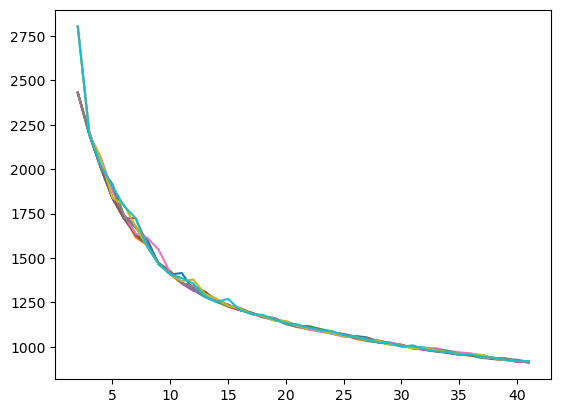

In [57]:
plt.plot(np.arange(2,42), ssd.T, )
plt.show()

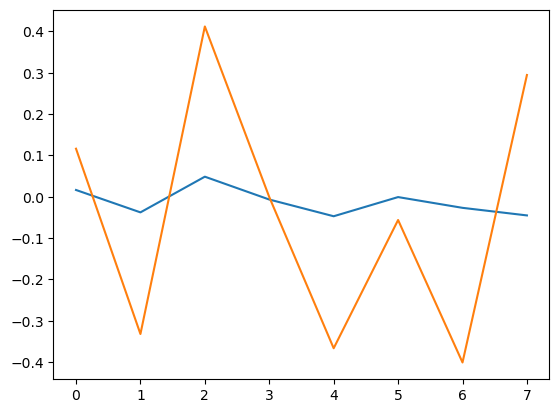

In [70]:
plt.plot(mu_l.mean(axis=0))
plt.plot(mu_l_x.mean(axis=0))

plt.show()